In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
 %%capture
! wget https://www.dropbox.com/s/m3fhdaallddln0q/mnist_png_224x3.tar.bz2?dl=0 -O mnist_png_224x3.tar.bz2
! tar -jxvf mnist_png_224x3.tar.bz2

In [3]:
import tensorflow as tf
import numpy as np
from PIL import Image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Activation,Flatten,Dense,Conv2D,Dropout,\
    MaxPool2D,GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [4]:
EPOCHS=30
BATCH_SIZE=200
IMG_SIZE=(224,224)
IMG_SHAPE = IMG_SIZE + (3,)

In [5]:
# train_dir = '/home/a/datasets_all/mnist_png_224x3/training/'
# validation_dir = '/home/a/datasets_all/mnist_png_224x3/testing'

train_dir = 'mnist_png_224x3/training/'
validation_dir = 'mnist_png_224x3/testing/'

In [6]:
inputs = tf.keras.Input(shape=IMG_SHAPE)
x = Conv2D(32, (3,3))(inputs)
x = Activation('relu')(x)
x = Conv2D(32, (3,3))(x)
x = Activation('relu')(x)
x = MaxPool2D(pool_size=(2,2))(x)
x = Conv2D(64, (3,3))(x)
x = Activation('relu')(x)
x = Conv2D(64, (3,3))(x)
x = Activation('relu')(x)
x = MaxPool2D(pool_size=(2,2))(x)
x = Flatten()(x)
x = Dense(512)(x)
x = Activation('relu')(x)
x = Dropout(0.2)(x)
x = Dense(10)(x)
x = Activation('softmax')(x)

In [7]:
model = tf.keras.Model(inputs, x)

In [8]:
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [9]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 activation (Activation)     (None, 222, 222, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 32)      9248      
                                                                 
 activation_1 (Activation)   (None, 220, 220, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 32)     0         
 )                                                               
                                                             

In [10]:
model.optimizer.get_config()

{'amsgrad': False,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'decay': 0.0,
 'epsilon': 1e-07,
 'learning_rate': 0.0001,
 'name': 'Adam'}

In [11]:
datagen = ImageDataGenerator(rescale=1./255,
                             rotation_range=15,
                             width_shift_range=0.2,
                             height_shift_range=0.1,
                             zoom_range=0.1)

In [12]:
train_data = datagen.flow_from_directory(train_dir,
                                         target_size=(224,224),
                                         batch_size=32,   # train_straight: 200
                                         color_mode='rgb'  # баба: class_mode='categorical'
                                         # class_mode='categorical'
                                        ) 

Found 60000 images belonging to 10 classes.


In [13]:
test_data = datagen.flow_from_directory(validation_dir,
                                        target_size=(224,224),
                                        batch_size=32,   # train_straight: 200
                                        color_mode='rgb'
                                        # class_mode='categorical'
                                       )

Found 10000 images belonging to 10 classes.


In [14]:
earlystop = EarlyStopping(monitor='val_loss', # better than val_acc
                          patience=3, 
                          mode='auto', # default
                          verbose=1)

In [20]:
checkpoint = ModelCheckpoint('korea_224_lr-4_step30-5_no_ROP.h5', 
                             monitor='val_loss',
                             save_best_only=True,
                             mode='auto',
                             verbose=1)

In [16]:
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', 
                              factor = 0.3, 
                              patience = 2, 
                              min_delta = 0.001,
                              mode='auto',
                              verbose=1)

In [17]:
history = model.fit(train_data,
                    # steps_per_epoch=len(train_data)//BATCH_SIZE, # 300
                    steps_per_epoch=30,
                    validation_data=test_data,
                    validation_steps=5,
                    epochs=EPOCHS,
                    callbacks=[earlystop, checkpoint])

Epoch 1/30
30/30 [==============================] - ETA: 0s - loss: 1.9882 - accuracy: 0.3177
Epoch 1: val_loss improved from inf to 1.77216, saving model to korea_224_lr-4_step30-5.h5
30/30 [==============================] - 26s 725ms/step - loss: 1.9882 - accuracy: 0.3177 - val_loss: 1.7722 - val_accuracy: 0.3938
Epoch 2/30
30/30 [==============================] - ETA: 0s - loss: 1.4911 - accuracy: 0.5125
Epoch 2: val_loss improved from 1.77216 to 1.20888, saving model to korea_224_lr-4_step30-5.h5
30/30 [==============================] - 23s 771ms/step - loss: 1.4911 - accuracy: 0.5125 - val_loss: 1.2089 - val_accuracy: 0.6125
Epoch 3/30
30/30 [==============================] - ETA: 0s - loss: 1.2029 - accuracy: 0.5958
Epoch 3: val_loss improved from 1.20888 to 1.10782, saving model to korea_224_lr-4_step30-5.h5
30/30 [==============================] - 22s 720ms/step - loss: 1.2029 - accuracy: 0.5958 - val_loss: 1.1078 - val_accuracy: 0.6687
Epoch 4/30
30/30 [=======================

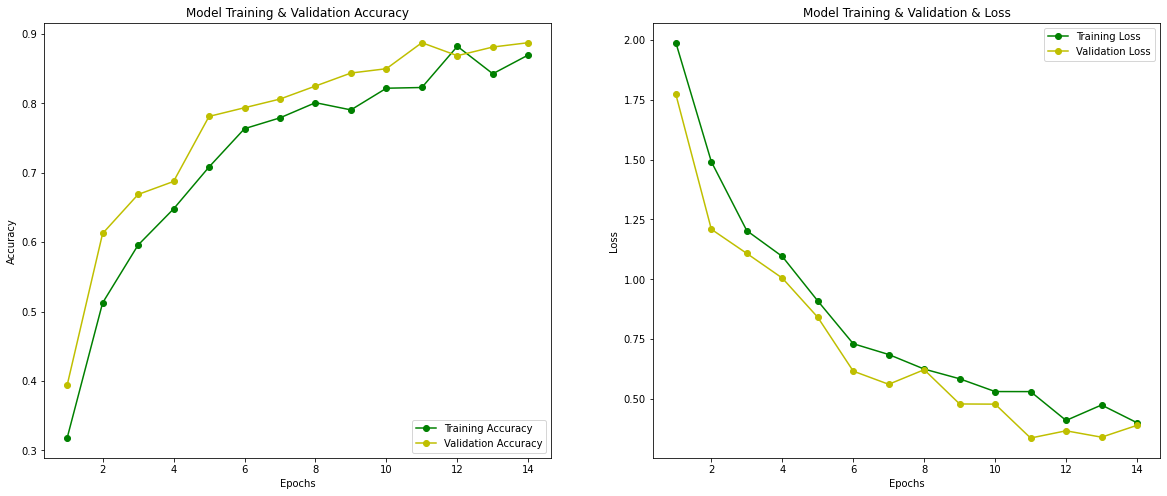

In [18]:
fig , ax = plt.subplots(1,2)
fig.set_size_inches(20, 8)

train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = range(1, len(train_acc) + 1)

ax[0].plot(epochs , train_acc , 'g-o' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'y-o' , label = 'Validation Accuracy')
ax[0].set_title('Model Training & Validation Accuracy')
ax[0].legend(loc = 'lower right')
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'y-o' , label = 'Validation Loss')
ax[1].set_title('Model Training & Validation & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")

plt.show()

In [19]:
! cp korea_224_lr-4_step30-5_no_ROP.h5 /content/gdrive/My\ Drive/

cp: cannot stat 'korea_224_lr-4_step30-5_no_ROP.h5': No such file or directory
